<a href="https://colab.research.google.com/github/vjanapaty/Estuarine_Research/blob/main/WATER_QUALITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ls FROM_SFBAY/*monthly_ma.csv

FROM_SFBAY/SFBCCWQ_monthly_ma.csv  FROM_SFBAY/SFBGCWQ_monthly_ma.csv
FROM_SFBAY/SFBFMWQ_monthly_ma.csv  FROM_SFBAY/SFBSMWQ_monthly_ma.csv


In [ ]:
#!pkill --oldest
import os
from google.colab import drive
drive.mount('drive')
os.chdir('drive/MyDrive/2022 SNPS')

Mounted at drive


In [ ]:
df = pd.read_csv(open('FROM_TIJ/TJRBRWQ.csv','rU'), encoding='utf-8', engine='c' )
df['Turb']

In [ ]:
ls FROM_PADILLA/*WQ.csv

FROM_PADILLA/PDBBPWQ.csv  FROM_PADILLA/PDBGSWQ.csv  FROM_PADILLA/PDBJLWQ.csv
FROM_PADILLA/PDBBYWQ.csv  FROM_PADILLA/PDBJEWQ.csv


In [ ]:
import pandas as pd
import numpy as np

def wq_agg(x):
    names = {
        'Temp_mean': x['Temp'].mean() , #+ 273.15
        'Temp_anomaly': x['Temp'].mean() - Temp_mean ,
        'SpCond_mean':  x['SpCond'].mean(),
        'SpCond_anomaly':  x['SpCond'].mean() - SpCond_mean,
        'Sal_mean':  x['Sal'].mean(),
        'Sal_anomaly':  x['Sal'].mean()- Sal_mean,
        'DO_mgl_mean': x['DO_mgl'].mean(),
        'DO_mgl_anomaly': x['DO_mgl'].mean() - DO_mgl_mean,
        'pH_mean': x['pH'].mean(),
        'pH_anomaly': x['pH'].mean() - pH_mean,
        'Turb_mean': x['Turb'].mean(),
        'Turb_anomaly': x['Turb'].mean() - Turb_mean }

    return pd.Series(names, index=['Temp_mean', 'Temp_anomaly',
                                   'SpCond_mean', 'SpCond_anomaly',
                                   'Sal_mean','Sal_anomaly',
                                   'DO_mgl_mean','DO_mgl_anomaly',
                                   'pH_mean', 'pH_anomaly',
                                   'Turb_mean', 'Turb_anomaly'])




df = pd.read_csv(open('FROM_PADILLA/PDBJEWQ.csv','rU'), encoding='utf-8', engine='c' )
# The following comments are useful for debugging where a non-numeric element exists
#df[~df.applymap(np.isreal).all(1)]
#df[~df.applymap(np.isreal).all(1)]
#df1 = df.applymap(lambda x: (isinstance(x, (int, float))))
#print(df1[~df1["Temp"]])
#print(df.loc[[131072]])
#print(df1.loc[[393214]])
df['Sal'] = pd.to_numeric(df['Sal'],errors='coerce')
df['DO_mgl'] = pd.to_numeric(df['DO_mgl'],errors='coerce')
df['Turb'] = pd.to_numeric(df['Turb'],errors='coerce')
df['Temp'] = pd.to_numeric(df['Temp'],errors='coerce')
df['SpCond'] = pd.to_numeric(df['SpCond'],errors='coerce')
df['pH'] = pd.to_numeric(df['pH'],errors='coerce')
# https://thispointer.com/pandas-replace-nan-with-mean-or-average-in-dataframe-using-fillna/

df['Temp'].fillna(value=df['Temp'].mean(), inplace=True)
df['SpCond'].fillna(value=df['SpCond'].mean(), inplace=True)
df['Sal'].fillna(value=df['Sal'].mean(), inplace=True)
df['DO_mgl'].fillna(value=df['DO_mgl'].mean(), inplace=True)
df['pH'].fillna(value=df['pH'].mean(), inplace=True)
df['Turb'].fillna(value=df['Turb'].mean(), inplace=True)

#df['Temp'].dropna(inplace=True)
#df['SpCond'].dropna(inplace=True)
#df['Sal'].dropna(inplace=True)
#df['DO_mgl'].dropna(inplace=True)
#df['pH'].dropna(inplace=True)
#df['Turb'].dropna(inplace=True)

df['Date'] = pd.to_datetime(df['DateTimeStamp'])
Temp_mean = df['Temp'].mean() #+ 273.15
SpCond_mean = df['SpCond'].mean()
Sal_mean = df['Sal'].mean()
DO_mgl_mean = df['SpCond'].mean()
pH_mean = df['pH'].mean()
Turb_mean = df['Turb'].mean()

df_out = df.groupby([df['Date'].dt.date]).apply(wq_agg)
df_out.to_csv('FROM_PADILLA/PDBJEWQ_ma.csv')
print(df_out)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: 'U' mode is deprecated


            Temp_mean  Temp_anomaly  SpCond_mean  SpCond_anomaly   Sal_mean  \
Date                                                                          
2009-07-01  20.090625      7.146451    29.566771        0.537819  19.019792   
2009-07-02  21.120833      8.176660    28.906875       -0.122076  18.565625   
2009-07-03  23.117708     10.173535    28.758958       -0.269993  18.417708   
2009-07-04  22.754167      9.809993    27.294375       -1.734576  17.381250   
2009-07-05  22.230208      9.286035    27.441562       -1.587389  17.485417   
...               ...           ...          ...             ...        ...   
2021-12-27   1.312500    -11.631674    14.175312      -14.853639   8.575000   
2021-12-28   1.613542    -11.330632    20.599271       -8.429681  12.563542   
2021-12-29   0.754167    -12.190007    28.145625       -0.883326  17.123958   
2021-12-30   0.319792    -12.624382    26.728333       -2.300618  16.206250   
2021-12-31   0.736458    -12.207715    25.707500    

In [ ]:
import pandas as pd
import numpy as np
# Average for entire month
# https://github.com/pandas-dev/pandas/issues/11166
# https://stackoverflow.com/questions/53845348/adding-a-line-terminator-in-pandas-ends-up-adding-another-r
# https://stackoverflow.com/questions/26646191/pandas-groupby-month-and-year
# https://stackoverflow.com/questions/26646191/pandas-groupby-month-and-year

def wq_agg_month(x):
    names = {
        'Temp_mean': x['Temp_mean'].mean() , #+ 273.15
        'Temp_anomaly': x['Temp_mean'].mean() - Temp_mean ,
        'SpCond_mean':  x['SpCond_mean'].mean(),
        'SpCond_anomaly':  x['SpCond_mean'].mean() - SpCond_mean,
        'Sal_mean':  x['Sal_mean'].mean(),
        'Sal_anomaly':  x['Sal_mean'].mean()- Sal_mean,
        'DO_mgl_mean': x['DO_mgl_mean'].mean(),
        'DO_mgl_anomaly': x['DO_mgl_mean'].mean() - DO_mgl_mean,
        'pH_mean': x['pH_mean'].mean(),
        'pH_anomaly': x['pH_mean'].mean() - pH_mean,
        'Turb_mean': x['Turb_mean'].mean(),
        'Turb_anomaly': x['Turb_mean'].mean() - Turb_mean }

    return pd.Series(names, index=['Temp_mean', 'Temp_anomaly',
                                   'SpCond_mean', 'SpCond_anomaly',
                                   'Sal_mean','Sal_anomaly',
                                   'DO_mgl_mean','DO_mgl_anomaly',
                                   'pH_mean', 'pH_anomaly',
                                   'Turb_mean', 'Turb_anomaly'])



#  FROM_SFBAY/SFBSMWQ_ma.csv

df = pd.read_csv(open('FROM_PADILLA/PDBJEWQ_ma.csv','r'), encoding='utf-8', engine='c')
Temp_mean = df['Temp_mean'].mean() #+ 273.15 Temp_mean
SpCond_mean = df['SpCond_mean'].mean()
Sal_mean = df['Sal_mean'].mean()
DO_mgl_mean = df['DO_mgl_mean'].mean()
pH_mean = df['pH_mean'].mean()
Turb_mean = df['Turb_mean'].mean()


df_out = df.groupby(pd.PeriodIndex(df['Date'], freq='M')).apply(wq_agg_month)

#df_out = df.groupby(pd.Grouper(freq="M")).apply(nut_agg_month)
df_out.to_csv('FROM_PADILLA/PDBJEWQ_monthly_ma.csv')



In [ ]:
# Must only be run if new VI files were created
import time
def cleanup_file (filename):
  infile = 'CSV_files_old/'+filename
  df_vi = pd.read_csv(open(infile,'r'), encoding='utf-8', engine='c')
  df_vi["month"] = df_vi["month"].astype(int).map("{:02}".format).astype(str)
  df_vi["year"] = df_vi["year"].astype(int).astype(str)
  cols=["year","month"]

  date = df_vi[cols].apply(lambda x: '-'.join(x.values), axis="columns")

  df_vi = df_vi.drop('year', 1) # where 1 is the axis number (0 for rows and 1 for columns.)
  df_vi = df_vi.drop('month', 1)
  df_vi = df_vi.drop('.geo', 1)

  df_vi.insert(loc=0, column='Date', value=date)
  df_vi.reset_index(drop=True, inplace=True)
  df_vi = df_vi.drop('system:index',1)

  df_vi.head(5)
  outfile = 'A_CSV_files/' +filename
  df_vi.to_csv(outfile)
  time.sleep(2)



filenames = ['chla_avg_monthly.csv', 'cvi_avg_monthly.csv', 'DO_avg_monthly.csv', 'gndvi_avg_monthly.csv', 
             'mndwi_avg_monthly.csv', 'ndvi_avg_monthly.csv', 'ndwi_avg_monthly.csv', 'ssi_avg_monthly.csv', 
             'sst_avg_monthly.csv', 'TPhos_avg_monthly.csv', 'turb_avg_monthly.csv',
             'chla_avg_anomaly.csv', 'cvi_avg_anomaly.csv', 'DO_avg_anomaly.csv', 'gndvi_avg_anomaly.csv', 
             'mndwi_avg_anomaly.csv', 'ndvi_avg_anomaly.csv', 'ndwi_avg_anomaly.csv', 'ssi_avg_anomaly.csv', 
             'sst_avg_anomaly.csv', 'TPhos_avg_anomaly.csv', 'turb_avg_anomaly.csv',
             ]

for file in filenames:
  cleanup_file(file)


In [ ]:
#Merges all the VI files with ELK files
def merge_file(file, left):
  filename = 'A_CSV_files/' + file
  right = pd.read_csv(filename)
  result = pd.merge(left, right, on="Date")
  left = result.drop('Unnamed: 0', 1)
  return(left)


filenames = ['chla_avg_monthly.csv', 'cvi_avg_monthly.csv', 'DO_avg_monthly.csv', 'gndvi_avg_monthly.csv', 
             'mndwi_avg_monthly.csv', 'ndvi_avg_monthly.csv', 'ndwi_avg_monthly.csv', 'ssi_avg_monthly.csv', 
             'sst_avg_monthly.csv', 'TPhos_avg_monthly.csv', 'turb_avg_monthly.csv',
             'chla_avg_anomaly.csv', 'cvi_avg_anomaly.csv', 'DO_avg_anomaly.csv', 'gndvi_avg_anomaly.csv', 
             'mndwi_avg_anomaly.csv', 'ndvi_avg_anomaly.csv', 'ndwi_avg_anomaly.csv', 'ssi_avg_anomaly.csv', 
             'sst_avg_anomaly.csv', 'TPhos_avg_anomaly.csv', 'turb_avg_anomaly.csv',
             ]

left = pd.read_csv('From_Elkhorn_CSV/ELKVMWQ_monthly_ma.csv') # first time
for file in filenames:
  left = merge_file(file, left)

left.rename(columns={'NDVI':'NDVI_anomaly'},inplace=True)

left.head(30)


left.to_csv('A_CSV_files/Merged_ELKVMWQ.csv')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
ls FROM_PADILLA/*monthly_ma.csv

FROM_PADILLA/PDBBPWQ_monthly_ma.csv  FROM_PADILLA/PDBJEWQ_monthly_ma.csv
FROM_PADILLA/PDBBYWQ_monthly_ma.csv  FROM_PADILLA/PDBJLWQ_monthly_ma.csv
FROM_PADILLA/PDBGSWQ_monthly_ma.csv


In [ ]:
import pandas as pd
df1 = pd.read_csv('FROM_PADILLA/PDBBPWQ_monthly_ma.csv')
df2 = pd.read_csv('FROM_PADILLA/PDBJEWQ_monthly_ma.csv')
df3 = pd.read_csv('FROM_PADILLA/PDBBYWQ_monthly_ma.csv')
df4 = pd.read_csv('FROM_PADILLA/PDBJLWQ_monthly_ma.csv')
df5 = pd.read_csv('FROM_PADILLA/PDBGSWQ_monthly_ma.csv')
frames = [df1, df2, df3, df4, df5]
result = pd.concat(frames)
#result = result.drop('Unnamed: 0',1)
result.to_csv(('FROM_PADILLA/all_PADILLA_WQ_merged.csv'))

In [ ]:

#--------------------------------------------------------------------------------------------------------

# Average for entire month
# https://github.com/pandas-dev/pandas/issues/11166
# https://stackoverflow.com/questions/53845348/adding-a-line-terminator-in-pandas-ends-up-adding-another-r
# https://stackoverflow.com/questions/26646191/pandas-groupby-month-and-year
# https://stackoverflow.com/questions/26646191/pandas-groupby-month-and-year

def wq_agg_month(x):
    names = {
        'Temp_mean': x['Temp_mean'].mean() , #+ 273.15
        'Temp_anomaly': x['Temp_mean'].mean() - Temp_mean ,
        'SpCond_mean':  x['SpCond_mean'].mean(),
        'SpCond_anomaly':  x['SpCond_mean'].mean() - SpCond_mean,
        'Sal_mean':  x['Sal_mean'].mean(),
        'Sal_anomaly':  x['Sal_mean'].mean()- Sal_mean,
        'DO_mgl_mean': x['DO_mgl_mean'].mean(),
        'DO_mgl_anomaly': x['DO_mgl_mean'].mean() - DO_mgl_mean,
        'pH_mean': x['pH_mean'].mean(),
        'pH_anomaly': x['pH_mean'].mean() - pH_mean,
        'Turb_mean': x['Turb_mean'].mean(),
        'Turb_anomaly': x['Turb_mean'].mean() - Turb_mean }

    return pd.Series(names, index=['Temp_mean', 'Temp_anomaly',
                                   'SpCond_mean', 'SpCond_anomaly',
                                   'Sal_mean','Sal_anomaly',
                                   'DO_mgl_mean','DO_mgl_anomaly',
                                   'pH_mean', 'pH_anomaly',
                                   'Turb_mean', 'Turb_anomaly'])



df = pd.read_csv(open('FROM_PADILLA/all_PADILLA_WQ_merged.csv','r'), encoding='utf-8', engine='c')
Temp_mean = df['Temp_mean'].mean() #+ 273.15 Temp_mean
SpCond_mean = df['SpCond_mean'].mean()
Sal_mean = df['Sal_mean'].mean()
DO_mgl_mean = df['DO_mgl_mean'].mean()
pH_mean = df['pH_mean'].mean()
Turb_mean = df['Turb_mean'].mean()


df_out = df.groupby(pd.PeriodIndex(df['Date'], freq='M')).apply(wq_agg_month)

#df_out = df.groupby(pd.Grouper(freq="M")).apply(nut_agg_month)
df_out.to_csv('FROM_PADILLA/mean_all_PADILLA_WQ_merged.csv')


In [ ]:


#--------------------------------------------------------------------------------------------------------
#Merges all the VI files with ELK files
def merge_file(file, left):
  filename = 'A_CSV_files/' + file
  right = pd.read_csv(filename)
  result = pd.merge(left, right, on="Date")
  left = result.drop('Unnamed: 0', 1)
  return(left)


filenames = ['chla_avg_monthly.csv', 'cvi_avg_monthly.csv', 'DO_avg_monthly.csv', 'gndvi_avg_monthly.csv', 
             'mndwi_avg_monthly.csv', 'ndvi_avg_monthly.csv', 'ndwi_avg_monthly.csv', 'ssi_avg_monthly.csv', 
             'sst_avg_monthly.csv', 'TPhos_avg_monthly.csv', 'turb_avg_monthly.csv',
             'chla_avg_anomaly.csv', 'cvi_avg_anomaly.csv', 'DO_avg_anomaly.csv', 'gndvi_avg_anomaly.csv', 
             'mndwi_avg_anomaly.csv', 'ndvi_avg_anomaly.csv', 'ndwi_avg_anomaly.csv', 'ssi_avg_anomaly.csv', 
             'sst_avg_anomaly.csv', 'TPhos_avg_anomaly.csv', 'turb_avg_anomaly.csv',
             ]

left = pd.read_csv('From_Elkhorn_CSV/mean_all_WQ_merged.csv') # first time
for file in filenames:
  left = merge_file(file, left)

left.rename(columns={'NDVI':'NDVI_anomaly'},inplace=True)

left.head(30)


left.to_csv('A_CSV_files/all_WQ_Merged.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:


df = pd.read_csv('A_CSV_files/all_WQ_Merged.csv') # first time
df['ChlA_mean'].fillna(value=df['ChlA_mean'].mean(), inplace=True)
df['CVI_mean'].fillna(value=df['CVI_mean'].mean(), inplace=True)
df['DO_mean'].fillna(value=df['DO_mean'].mean(), inplace=True)
df['GNDVI_mean'].fillna(value=df['GNDVI_mean'].mean(), inplace=True)
df['MNDWI_mean'].fillna(value=df['MNDWI_mean'].mean(), inplace=True)
df['NDVI_mean'].fillna(value=df['NDVI_mean'].mean(), inplace=True)
df['NDWI_mean'].fillna(value=df['NDWI_mean'].mean(), inplace=True)
df['CVI_mean'].fillna(value=df['CVI_mean'].mean(), inplace=True)
df['SSI_mean'].fillna(value=df['SSI_mean'].mean(), inplace=True)
df['SST_mean'].fillna(value=df['SST_mean'].mean(), inplace=True)
df['TPhos_mean'].fillna(value=df['TPhos_mean'].mean(), inplace=True)
df['TURB_mean'].fillna(value=df['TURB_mean'].mean(), inplace=True)


df['ChlA_anomaly'].fillna(method='ffill', inplace=True)
df['CVI_anomaly'].fillna(method='ffill', inplace=True)
df['DO_anomaly'].fillna(method='ffill', inplace=True)
df['GNDVI_anomaly'].fillna(method='ffill', inplace=True)
df['MNDWI_anomaly'].fillna(method='ffill', inplace=True)
df['NDVI_anomaly'].fillna(method='ffill', inplace=True)
df['NDWI_anomaly'].fillna(method='ffill', inplace=True)
df['CVI_anomaly'].fillna(method='ffill', inplace=True)
df['SSI_anomaly'].fillna(method='ffill', inplace=True)
df['SST_anomaly'].fillna(method='ffill', inplace=True)
df['TPhos_anomaly'].fillna(method='ffill', inplace=True)
df['TURB_anomaly'].fillna(method='ffill', inplace=True)
df.to_csv('A_CSV_files/no_blank_all_WQ_Merged.csv')


In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from PIL import Image

Satellite_indices = ['ChlA_mean', 'DO_mean', 'GNDVI_mean', 'MNDWI_mean', 'NDVI_mean'
                    , 'NDWI_mean', 'SSI_mean', 'SST_mean', 'TPhos_mean', 'TURB_mean', 'CVI_mean']

outputs = ['Temp_mean', 'SpCond_mean', 'Sal_mean', 'DO_mgl_mean', 'pH_mean', 'Turb_mean']

data = pd.read_csv('A_CSV_files/no_blank_all_WQ_Merged.csv')
data = data[data['Date'].str.contains('-07')]
#df[df['DATE'].str.contains('May')]

#data.head(5)

#fig.suptitle('Correlation of PO4 subplots')




for i in range (len(outputs)):
  ylabel =  outputs[i]
  y = data[ylabel].fillna(method='ffill')
  for j in range (len(Satellite_indices)):
      x = data[Satellite_indices[j]].fillna(method='ffill')
      correlation = x.corr(y)
      a, b = np.poly1d(np.polyfit(x, y, 1))
      plt.plot(x,a*x+b, color='red', linewidth=2)
      plt.xlabel('L7Sat_' +Satellite_indices[j])
      plt.ylabel('ELK_' +ylabel)
      plt.scatter(x, y) 
      title = ylabel + ' ' + Satellite_indices[j] + ', Corr= ' + '{:.2f}'.format(correlation) + ' Slope=' +' + {:.2f}'.format(a)
      plt.title(title, size = 12)
      plt.show()
      plt.savefig(title+'.png')






In [ ]:
ls A_CSV_files


all_NUT_Merged.csv      DO_avg_monthly.csv     ndvi_avg_monthly.csv
all_NUT_Merged.gsheet   gndvi_avg_anomaly.csv  ndwi_avg_anomaly.csv
all_WQ_Merged.csv       gndvi_avg_monthly.csv  ndwi_avg_monthly.csv
A_NUT_DeVIATIONS.csv    Merged_ELKAPNUT.csv    no_blank_all_WQ_Merged.csv
A_NUT_FINAL.csv         Merged_ELKAPWQ.csv     Out_A_WQ_FINAL.csv
A_WQ_DeVIATIONS.csv     Merged_ELKNMNUT.csv    Out_A_WQ_FINAL.gsheet
A_WQ_DeVIATIONS.gsheet  Merged_ELKNMWQ.csv     ssi_avg_anomaly.csv
A_WQ_FINAL.csv          Merged_ELKSMNUT.csv    ssi_avg_monthly.csv
A_WQ_FINAL.gsheet       Merged_ELKSMWQ.csv     sst_avg_anomaly.csv
chla_avg_anomaly.csv    Merged_ELKVMNUT.csv    sst_avg_monthly.csv
chla_avg_monthly.csv    Merged_ELKVMWQ.csv     TPhos_avg_anomaly.csv
cvi_avg_anomaly.csv     mndwi_avg_anomaly.csv  TPhos_avg_monthly.csv
cvi_avg_monthly.csv     mndwi_avg_monthly.csv  turb_avg_anomaly.csv
DO_avg_anomaly.csv      ndvi_avg_anomaly.csv   turb_avg_monthly.csv


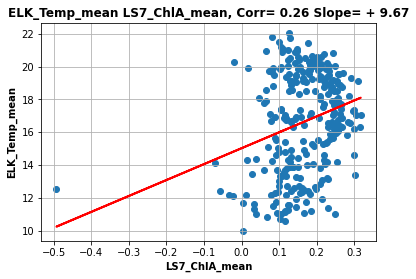

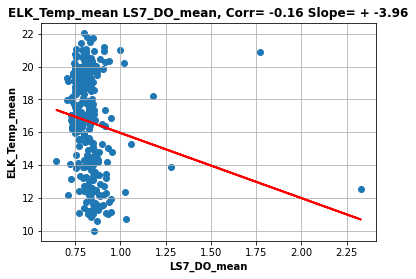

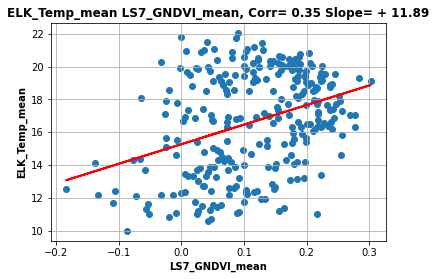

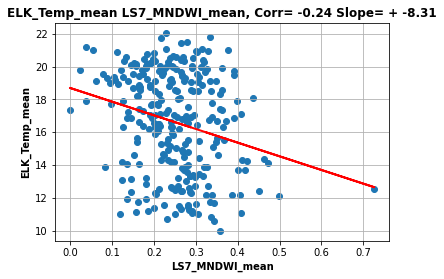

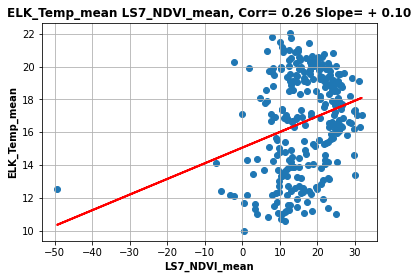

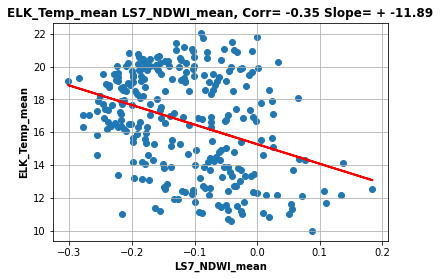

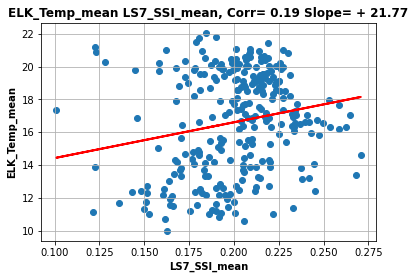

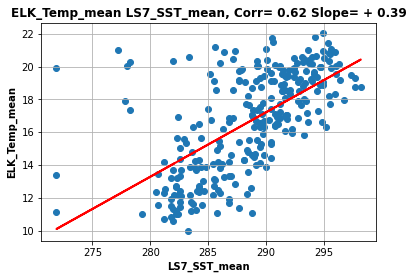

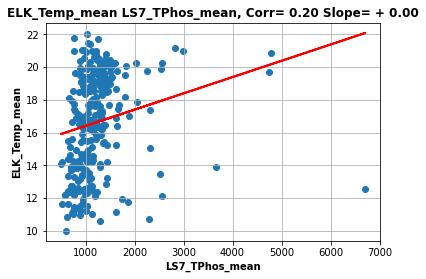

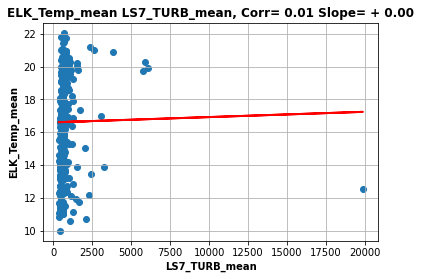

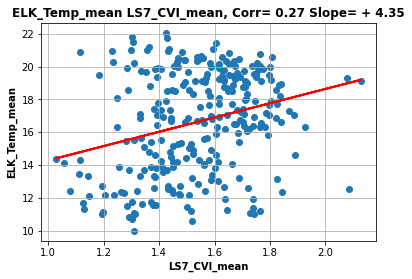

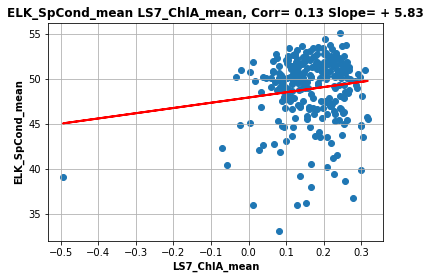

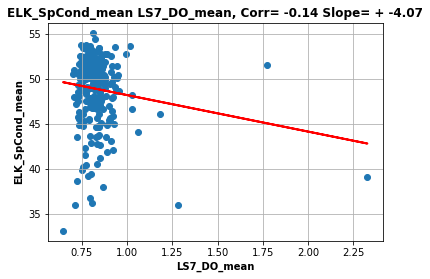

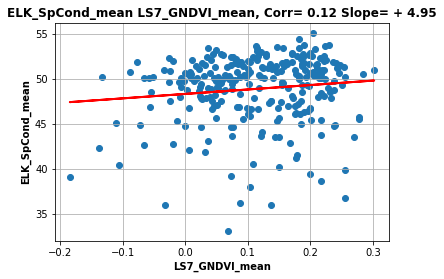

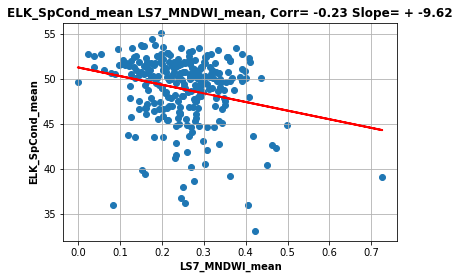

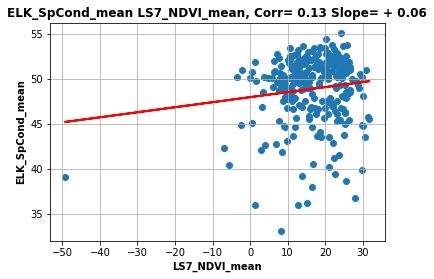

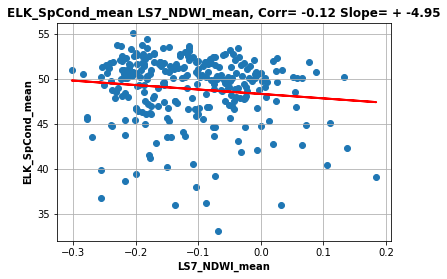

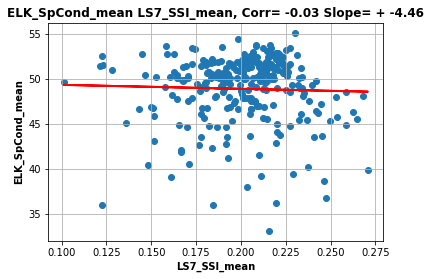

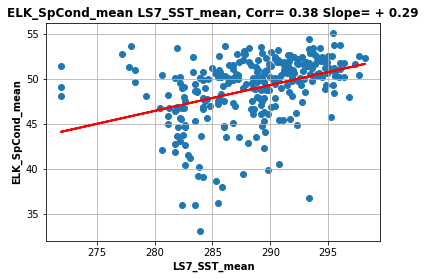

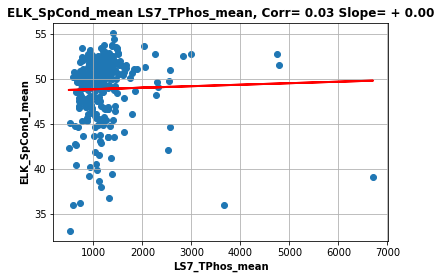

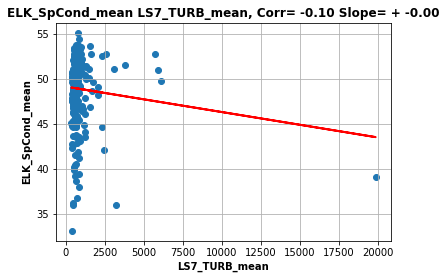

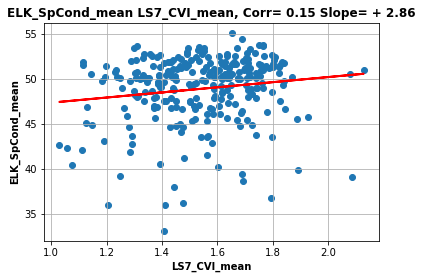

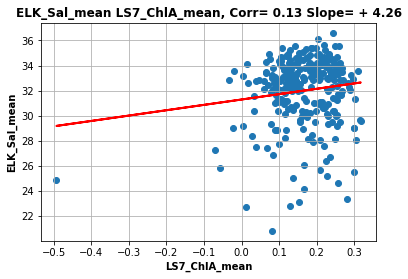

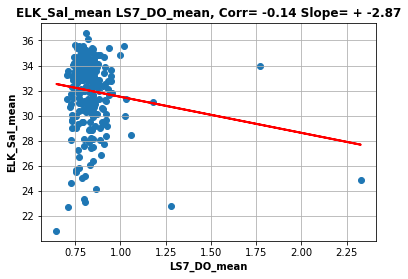

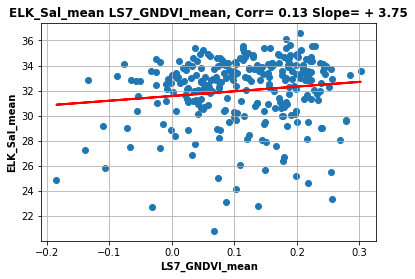

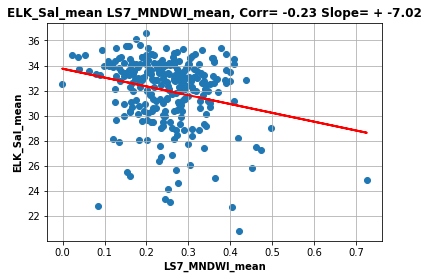

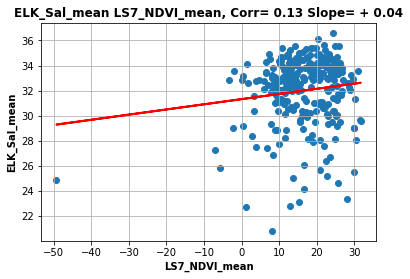

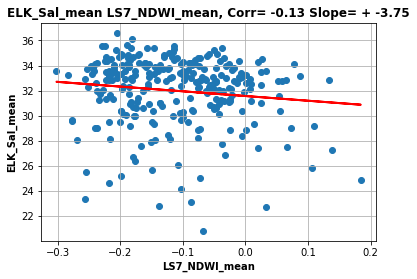

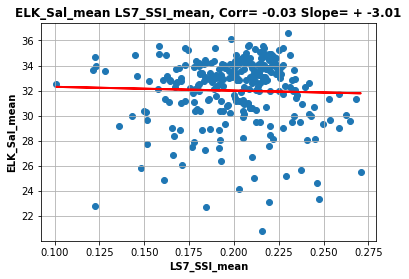

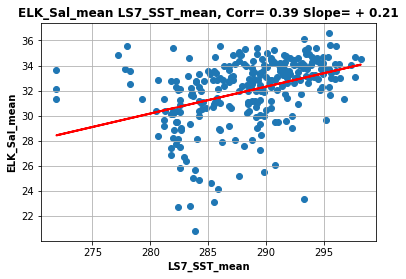

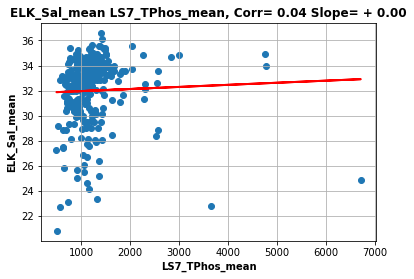

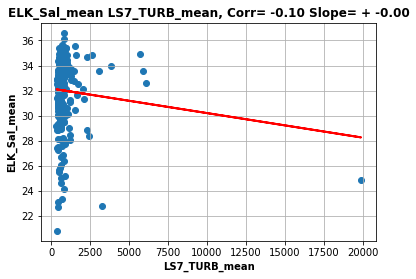

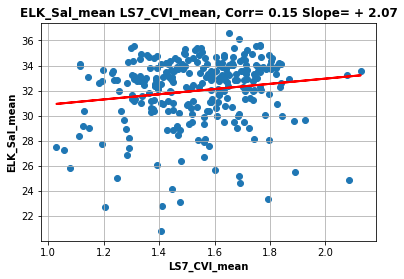

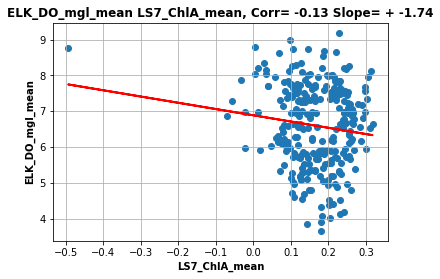

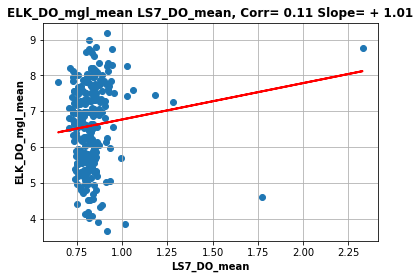

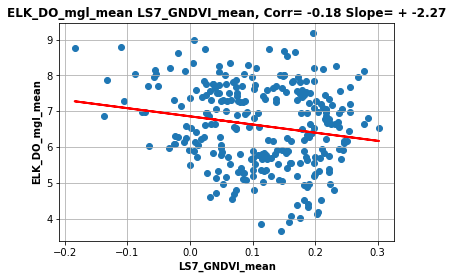

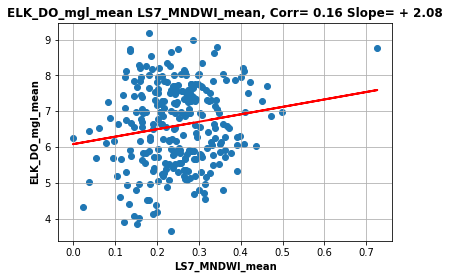

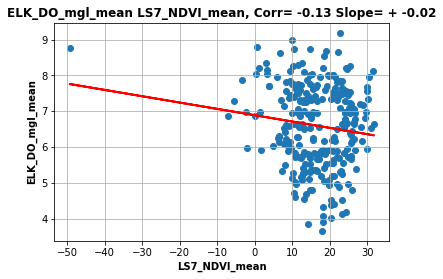

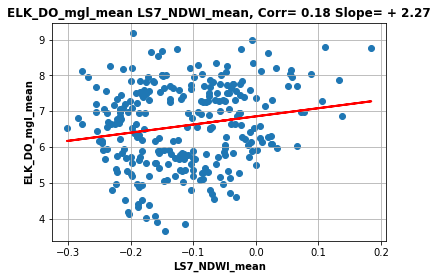

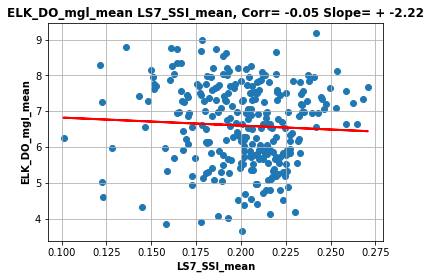

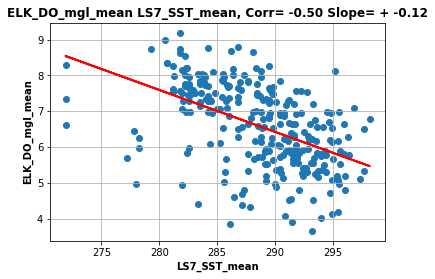

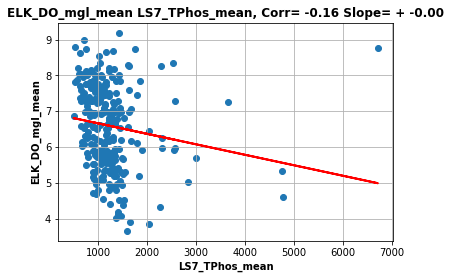

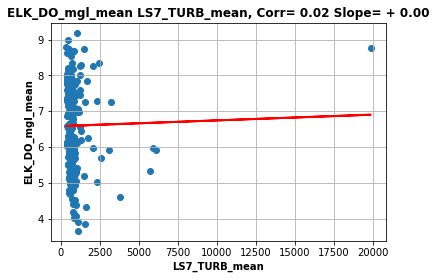

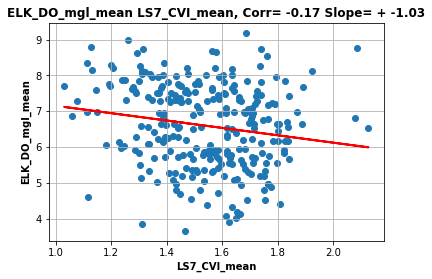

In [ ]:
import pandas as pd




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Satellite_indices = ['LS7_ChlA_mean', 'LS7_DO_mean', 'LS7_GNDVI_mean', 'LS7_MNDWI_mean', 'LS7_NDVI_mean'
                    , 'LS7_NDWI_mean', 'LS7_SSI_mean', 'LS7_SST_mean', 'LS7_TPhos_mean', 'LS7_TURB_mean', 'LS7_CVI_mean']

outputs = ['ELK_Temp_mean', 'ELK_SpCond_mean', 'ELK_Sal_mean', 'ELK_DO_mgl_mean']

#data = pd.read_csv('A_CSV_files/Merged_ELKNMNUT.csv')
inputDf = pd.read_csv('A_CSV_files/A_WQ_FINAL.csv') #  skipfooter=2)
#outputDf = pd.read_csv('A_CSV_files/Out_A_WQ_FINAL.csv', skiprows=[1])
#outputDf = pd.read_csv('A_CSV_files/Out_A_WQ_FINAL.csv')

#fig.suptitle('Correlation of PO4 subplots')


for i in range (len(outputs)):

  ylabel = outputs[i]
  y = inputDf[ylabel].fillna(method='ffill')
  for j in range (len(Satellite_indices)):
      x = inputDf[Satellite_indices[j]].fillna(method='ffill')
      correlation = x.corr(y)
      a, b = np.poly1d(np.polyfit(x, y, 1))
      plt.plot(x,a*x+b, color='red', linewidth=2)
      plt.xlabel(Satellite_indices[j],fontweight="bold")
      plt.ylabel(ylabel,fontweight="bold")
      plt.scatter(x, y)
      plt.grid(b='True')
      title = ylabel + ' ' + Satellite_indices[j] + ', Corr= ' + '{:.2f}'.format(correlation) + ' Slope=' +' + {:.2f}'.format(a)
      plt.title(title, size = 12,fontweight="bold")
      
      plt.show()
      #print(title)



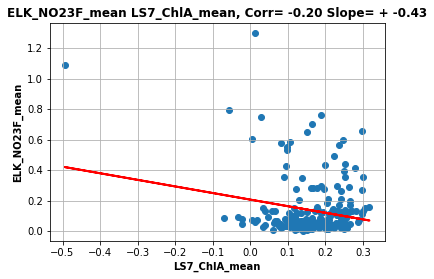

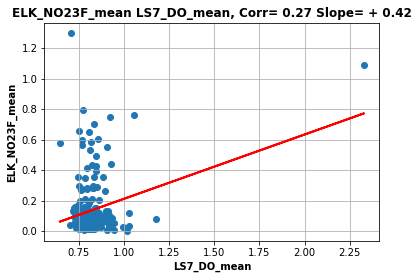

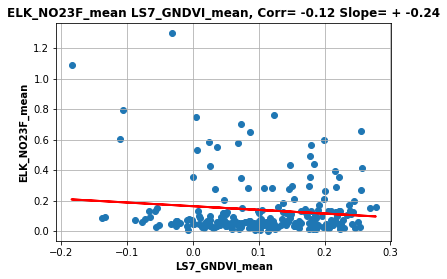

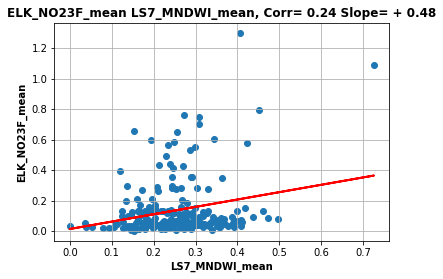

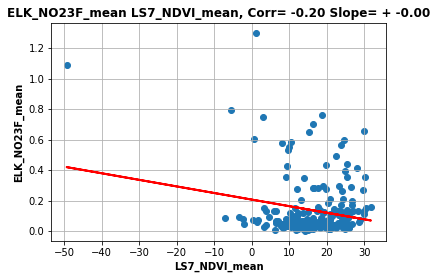

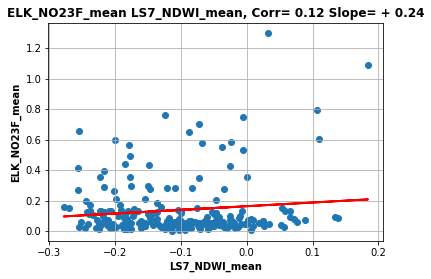

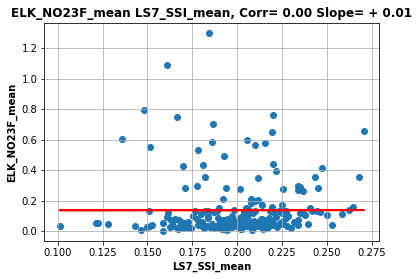

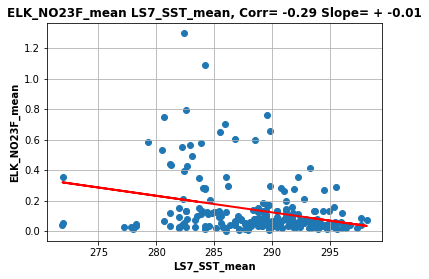

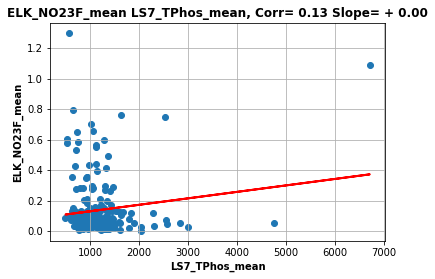

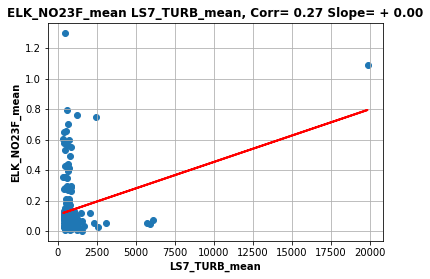

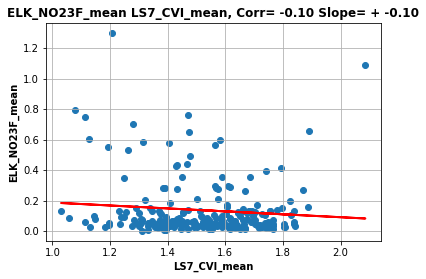

In [ ]:
import pandas as pd




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Satellite_indices = ['LS7_ChlA_mean', 'LS7_DO_mean', 'LS7_GNDVI_mean', 'LS7_MNDWI_mean', 'LS7_NDVI_mean'
                    , 'LS7_NDWI_mean', 'LS7_SSI_mean', 'LS7_SST_mean', 'LS7_TPhos_mean', 'LS7_TURB_mean', 'LS7_CVI_mean']

outputs = ['ELK_NO23F_mean']

#data = pd.read_csv('A_CSV_files/Merged_ELKNMNUT.csv')
inputDf = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv') #  skipfooter=2)
#outputDf = pd.read_csv('A_CSV_files/Out_A_WQ_FINAL.csv', skiprows=[1])
#outputDf = pd.read_csv('A_CSV_files/Out_A_WQ_FINAL.csv')

#fig.suptitle('Correlation of PO4 subplots')


for i in range (len(outputs)):

  ylabel = outputs[i]
  y = inputDf[ylabel].fillna(method='ffill')
  for j in range (len(Satellite_indices)):
      x = inputDf[Satellite_indices[j]].fillna(method='ffill')
      correlation = x.corr(y)
      a, b = np.poly1d(np.polyfit(x, y, 1))
      plt.plot(x,a*x+b, color='red', linewidth=2)
      plt.xlabel(Satellite_indices[j],fontweight="bold")
      plt.ylabel(ylabel,fontweight="bold")
      plt.scatter(x, y)
      plt.grid(b='True')
      title = ylabel + ' ' + Satellite_indices[j] + ', Corr= ' + '{:.2f}'.format(correlation) + ' Slope=' +' + {:.2f}'.format(a)
      plt.title(title, size = 12,fontweight="bold")
      
      plt.show()
      #print(title)



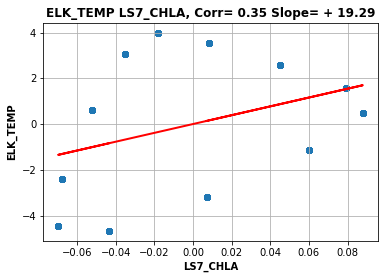

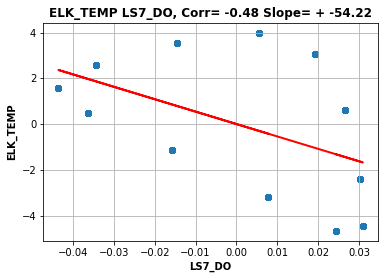

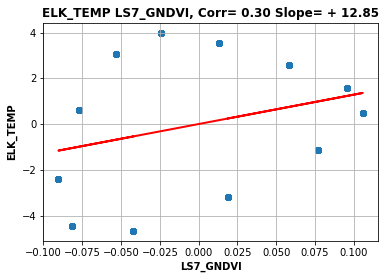

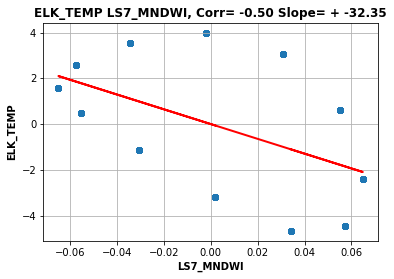

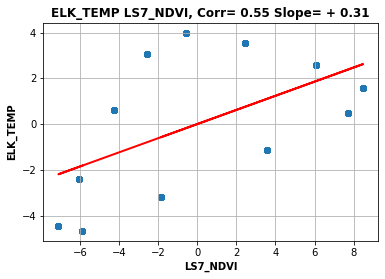

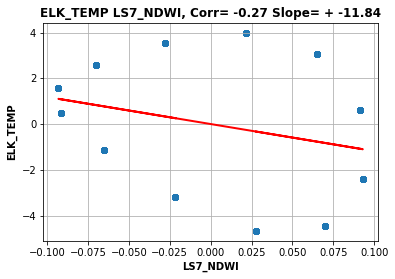

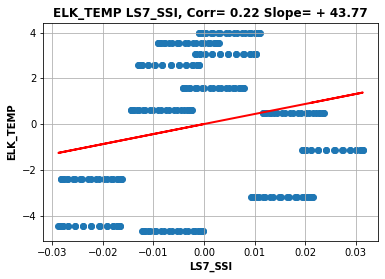

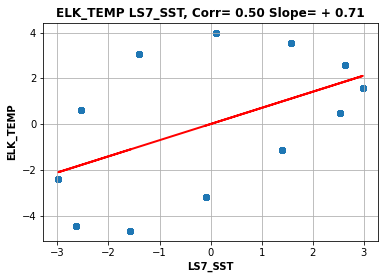

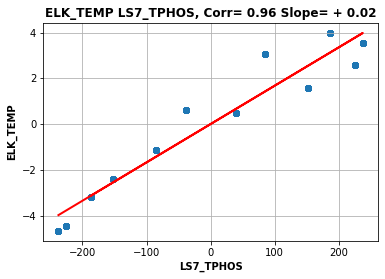

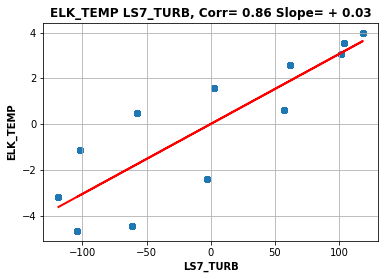

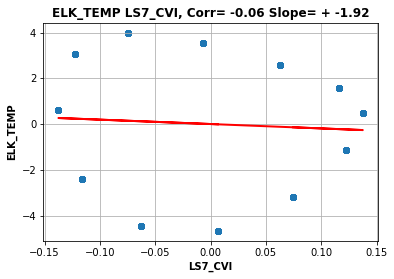

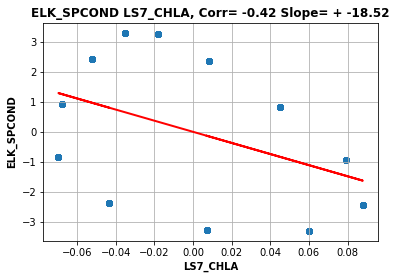

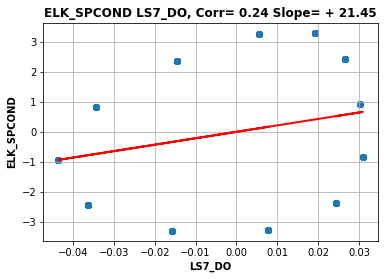

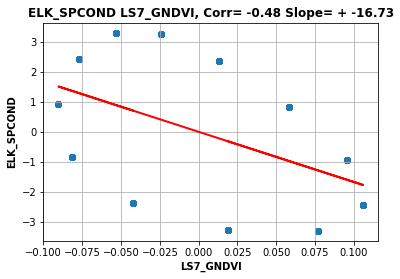

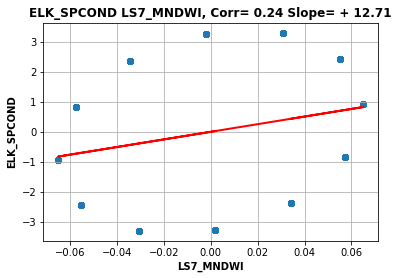

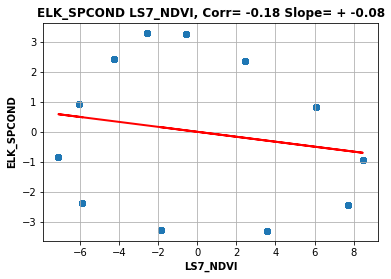

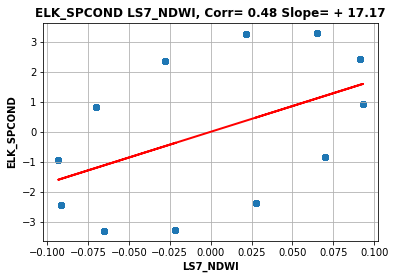

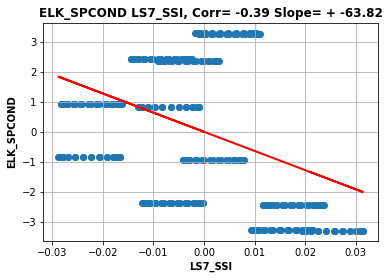

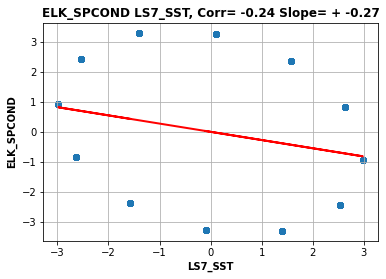

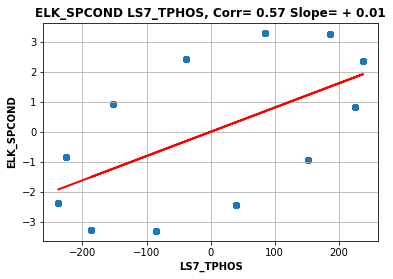

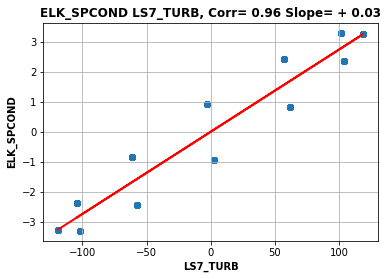

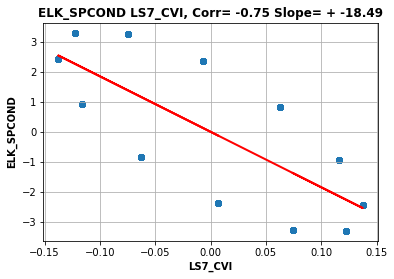

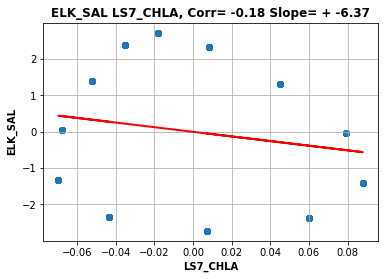

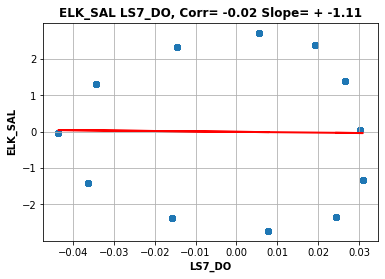

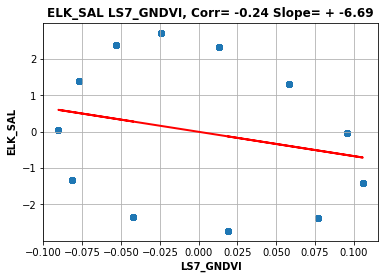

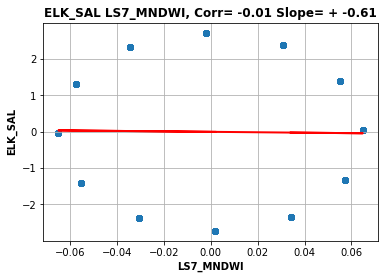

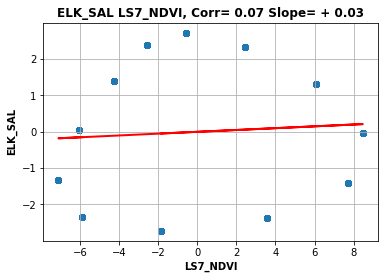

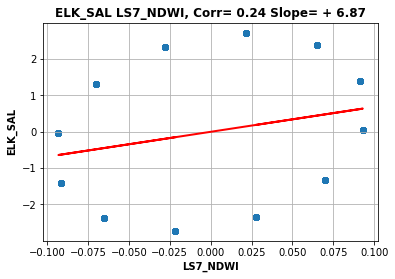

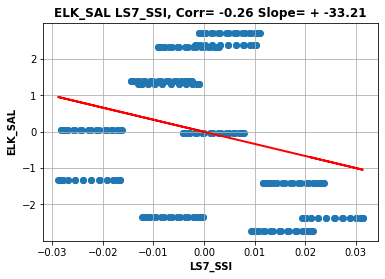

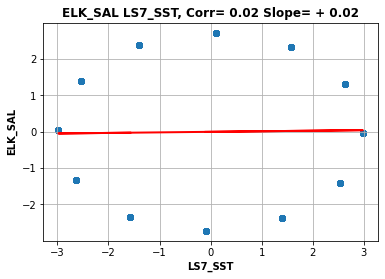

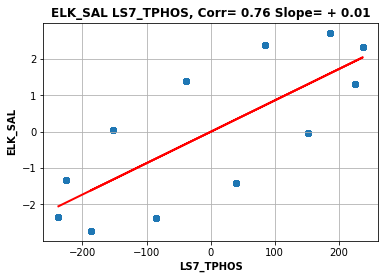

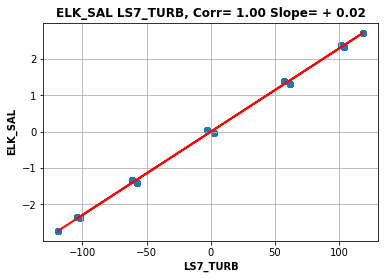

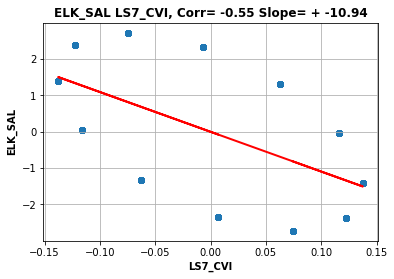

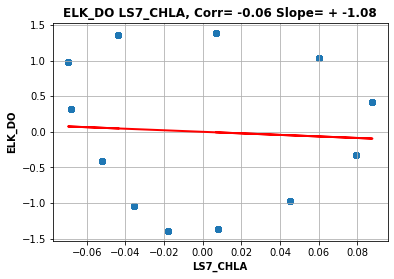

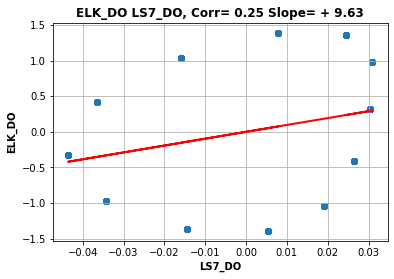

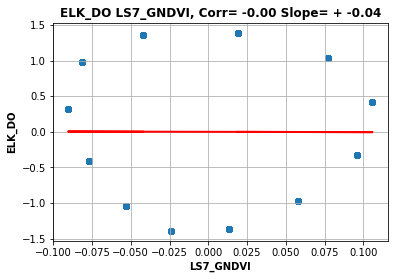

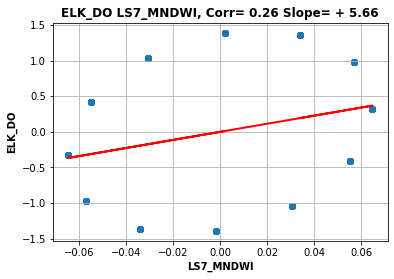

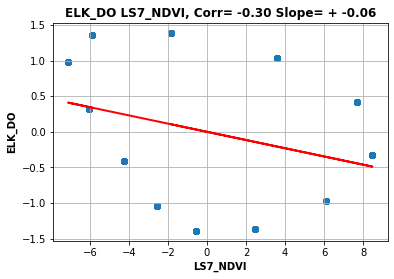

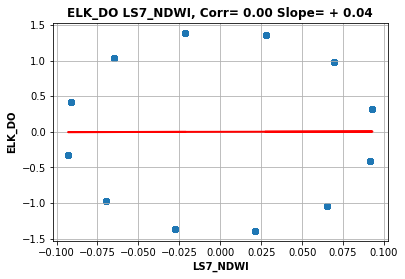

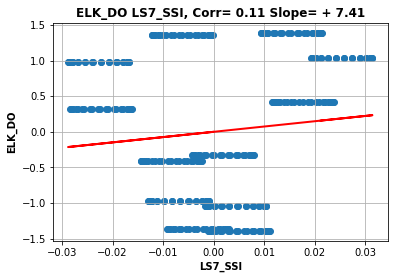

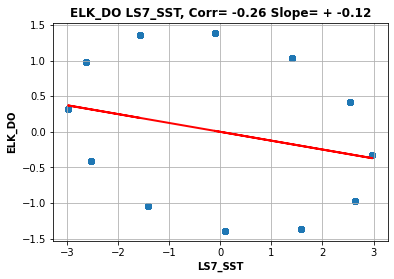

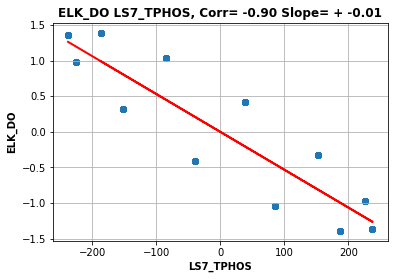

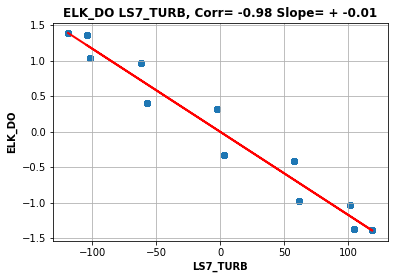

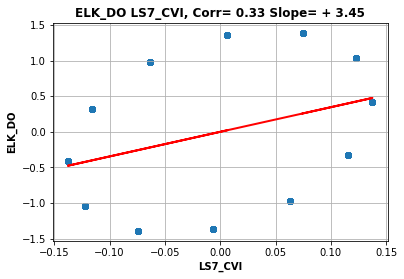

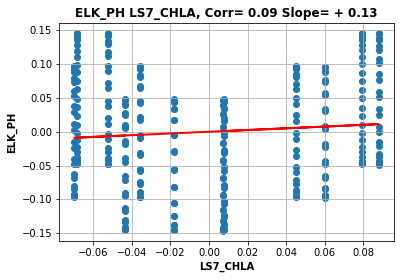

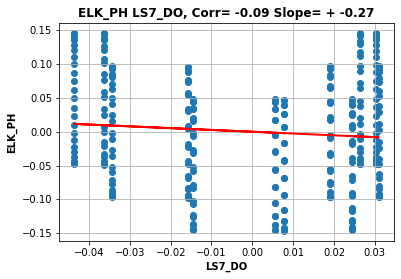

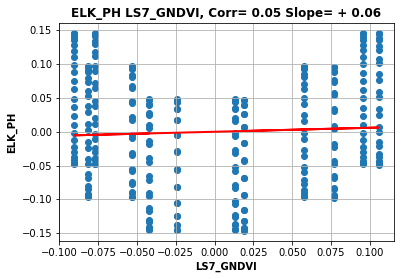

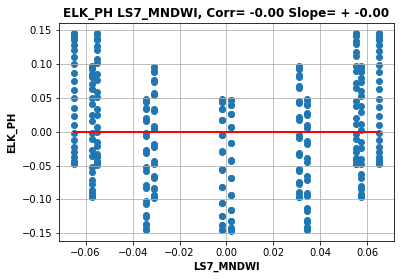

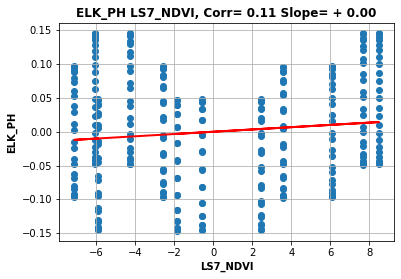

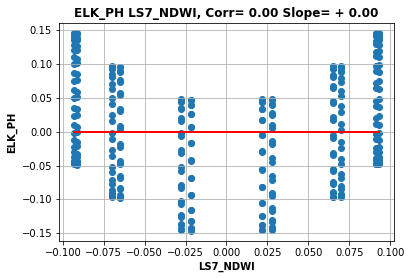

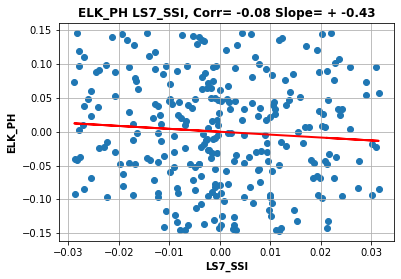

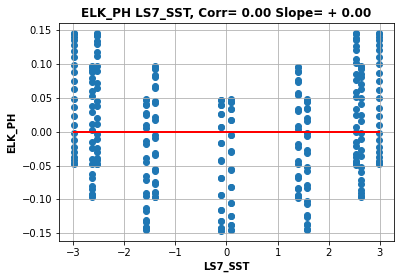

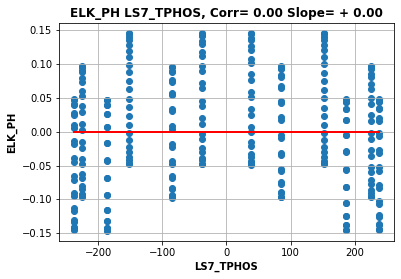

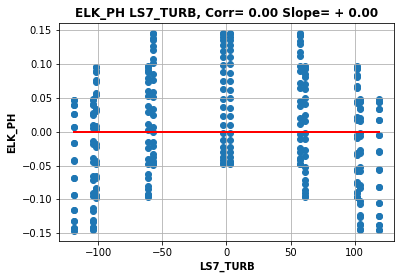

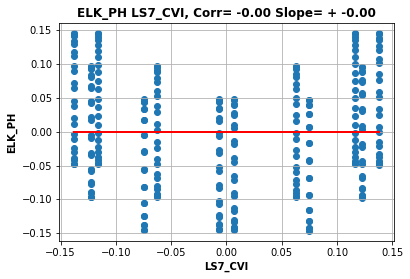

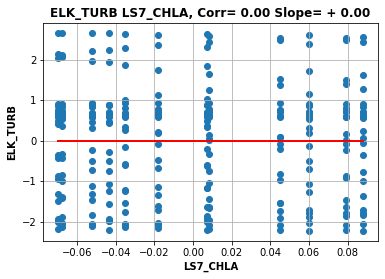

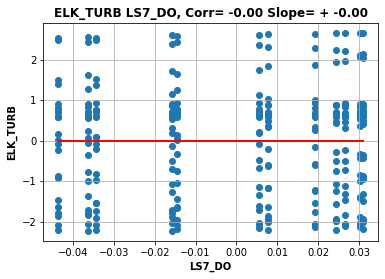

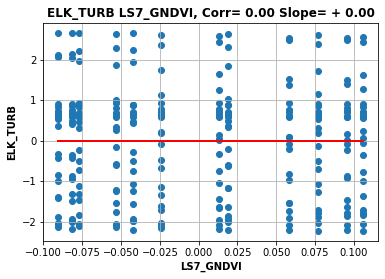

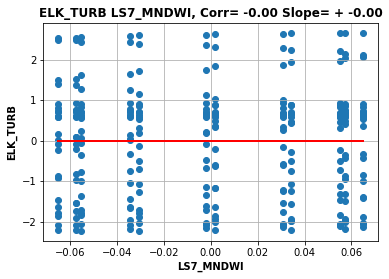

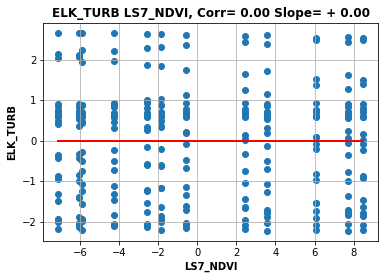

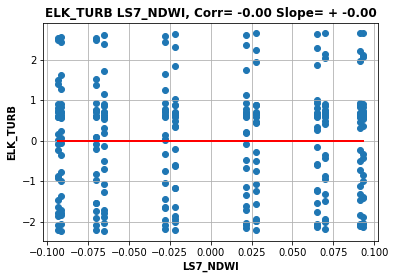

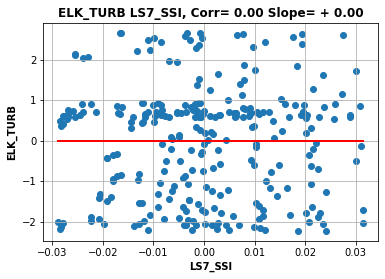

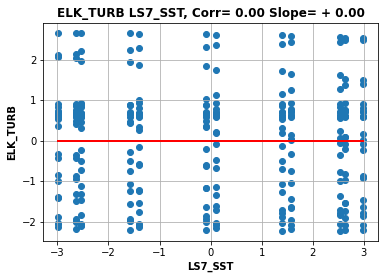

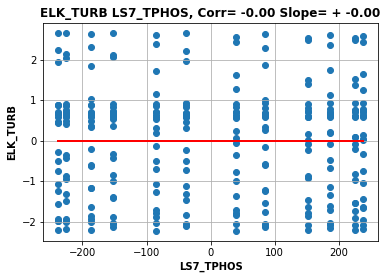

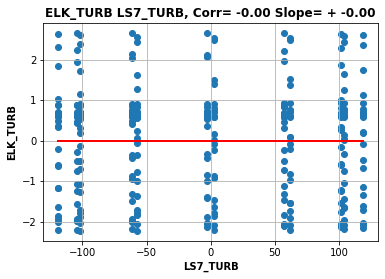

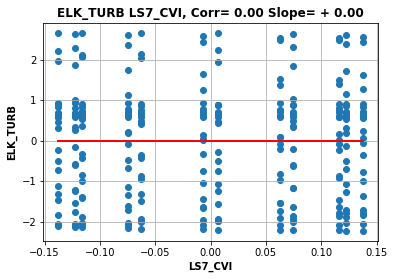

In [ ]:
import pandas as pd




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Satellite_indices = ['LS7_CHLA', 'LS7_DO', 'LS7_GNDVI', 'LS7_MNDWI', 'LS7_NDVI'
                    , 'LS7_NDWI', 'LS7_SSI', 'LS7_SST', 'LS7_TPHOS', 'LS7_TURB', 'LS7_CVI']

outputs = ['ELK_TEMP', 'ELK_SPCOND', 'ELK_SAL', 'ELK_DO', 'ELK_PH', 'ELK_TURB']

#data = pd.read_csv('A_CSV_files/Merged_ELKNMNUT.csv')
inputDf = pd.read_csv('A_CSV_files/Fourier.csv') #  skipfooter=2)
#outputDf = pd.read_csv('A_CSV_files/Out_A_WQ_FINAL.csv', skiprows=[1])
#outputDf = pd.read_csv('A_CSV_files/Out_A_WQ_FINAL.csv')

#fig.suptitle('Correlation of PO4 subplots')


for i in range (len(outputs)):

  ylabel = outputs[i]
  y = inputDf[ylabel].fillna(method='ffill')
  for j in range (len(Satellite_indices)):
      x = inputDf[Satellite_indices[j]].fillna(method='ffill')
      correlation = x.corr(y)
      a, b = np.poly1d(np.polyfit(x, y, 1))
      plt.plot(x,a*x+b, color='red', linewidth=2)
      plt.xlabel(Satellite_indices[j],fontweight="bold")
      plt.ylabel(ylabel,fontweight="bold")
      plt.scatter(x, y)
      plt.grid(b='True')
      title = ylabel + ' ' + Satellite_indices[j] + ', Corr= ' + '{:.2f}'.format(correlation) + ' Slope=' +' + {:.2f}'.format(a)
      plt.title(title, size = 12,fontweight="bold")
      
      plt.show()
      #print(title)



In [ ]:
import pandas as pd




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Satellite_indices = ['LS7_ChlA_anomaly', 'LS7_DO_anomaly', 'LS7_GNDVI_anomaly', 'LS7_MNDWI_anomaly', 'LS7_NDVI_anomaly'
                    , 'LS7_NDWI_anomaly', 'LS7_SSI_anomaly', 'LS7_SST_anomaly', 'LS7_TPhos_anomaly', 'LS7_TURB_anomaly', 'LS7_CVI_anomaly']

outputs = ['ELK_Temp_anomaly', 'ELK_SpCond_anomaly', 'ELK_Sal_anomaly', 'ELK_DO_mgl_anomaly', 'ELK_pH_anomaly', 'ELK_Turb_anomaly']

#data = pd.read_csv('A_CSV_files/Merged_ELKNMNUT.csv')
inputDf = pd.read_csv('A_CSV_files/A_WQ_FINAL.csv',  skipfooter=2)
#outputDf = pd.read_csv('A_CSV_files/Out_A_WQ_FINAL.csv', skiprows=[1])
outputDf = pd.read_csv('A_CSV_files/Out_A_WQ_FINAL.csv')

#fig.suptitle('Correlation of PO4 subplots')


for i in range (len(outputs)):
  ylabel = outputs[i]
  y = outputDf[ylabel].fillna(method='ffill')
  for j in range (len(Satellite_indices)):
      x = inputDf[Satellite_indices[j]].fillna(method='ffill')
      correlation = x.corr(y)
      a, b = np.poly1d(np.polyfit(x, y, 1))
      plt.plot(x,a*x+b, color='red', linewidth=2)
      plt.xlabel(Satellite_indices[j])
      plt.ylabel(ylabel)
      plt.scatter(x, y) 
      title = ylabel + ' ' + Satellite_indices[j] + ', Corr= ' + '{:.2f}'.format(correlation) + ' Slope=' +' + {:.2f}'.format(a)
      plt.title(title, size = 12)
      plt.show()




In [ ]:
import pandas as pd




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Satellite_indices = ['LS7_ChlA_mean', 'LS7_DO_mean', 'LS7_GNDVI_mean', 'LS7_MNDWI_mean', 'LS7_NDVI_mean'
                    , 'LS7_NDWI_mean', 'LS7_SSI_mean', 'LS7_SST_mean', 'LS7_TPhos_mean', 'LS7_TURB_mean', 'LS7_CVI_mean']

outputs = ['ELK_Temp_mean', 'ELK_SpCond_mean', 'ELK_Sal_mean', 'ELK_DO_mgl_mean', 'ELK_pH_mean', 'ELK_Turb_mean']

#data = pd.read_csv('A_CSV_files/Merged_ELKNMNUT.csv')
inputDf_1 = pd.read_csv('A_CSV_files/A_WQ_FINAL.csv')
inputDf_2 = pd.read_csv('A_CSV_files/A_WQ_FINAL.csv',  skipfooter=1)
inputDf_3 = pd.read_csv('A_CSV_files/A_WQ_FINAL.csv',  skipfooter=2)
inputDf_4 = pd.read_csv('A_CSV_files/A_WQ_FINAL.csv',  skipfooter=3)
inputDf_5 = pd.read_csv('A_CSV_files/A_WQ_FINAL.csv',  skipfooter=4)
inputDf_6 = pd.read_csv('A_CSV_files/A_WQ_FINAL.csv',  skipfooter=5)

outputDf_1 = pd.read_csv('A_CSV_files/A_WQ_FINAL.csv')
outputDf_2 = pd.read_csv('A_CSV_files/A_WQ_FINAL.csv', skiprows=[1]) 
outputDf_3 = pd.read_csv('A_CSV_files/A_WQ_FINAL.csv', skiprows=[1,2])
outputDf_4 = pd.read_csv('A_CSV_files/A_WQ_FINAL.csv', skiprows=[1,2,3])
outputDf_5 = pd.read_csv('A_CSV_files/A_WQ_FINAL.csv', skiprows=[1,2,3,4])
outputDf_6 = pd.read_csv('A_CSV_files/A_WQ_FINAL.csv', skiprows=[1,2,3,4,5])
#fig.suptitle('Correlation of PO4 subplots')


for i in range (len(outputs)):
  ylabel = outputs[i]
  y1 = outputDf_1[ylabel].fillna(method='ffill')
  y2 = outputDf_2[ylabel].fillna(method='ffill')
  y3 = outputDf_3[ylabel].fillna(method='ffill')
  y4 = outputDf_4[ylabel].fillna(method='ffill')
  y5 = outputDf_5[ylabel].fillna(method='ffill')
  y6 = outputDf_6[ylabel].fillna(method='ffill')
  for j in range (len(Satellite_indices)):
      x1 = inputDf_1[Satellite_indices[j]].fillna(method='ffill')
      x2 = inputDf_2[Satellite_indices[j]].fillna(method='ffill')
      x3 = inputDf_3[Satellite_indices[j]].fillna(method='ffill')
      x4 = inputDf_4[Satellite_indices[j]].fillna(method='ffill')
      x5 = inputDf_5[Satellite_indices[j]].fillna(method='ffill')
      x6 = inputDf_6[Satellite_indices[j]].fillna(method='ffill')
      c1 = x1.corr(y1)
      c2 = x2.corr(y2)
      c3 = x3.corr(y3)
      c4 = x4.corr(y4)
      c5 = x5.corr(y5)
      c6 = x6.corr(y6)
      a1, b1 = np.poly1d(np.polyfit(x1, y1, 1))
      a2, b2 = np.poly1d(np.polyfit(x2, y2, 1))
      a3, b3 = np.poly1d(np.polyfit(x3, y3, 1))
      a4, b4 = np.poly1d(np.polyfit(x4, y4, 1))
      a5, b5 = np.poly1d(np.polyfit(x5, y5, 1))
      a6, b6 = np.poly1d(np.polyfit(x6, y6, 1))
      #plt.plot(x,a*x+b, color='red', linewidth=2)
      #plt.xlabel(Satellite_indices[j])
      #plt.ylabel(ylabel)
      #plt.scatter(x, y) 
      title = ylabel + ' VS ' + Satellite_indices[j] + \
      '\t\n1 MONTH ,Corr= ' + '{:.2f}'.format(c1) + ' Slope=' +' + {:.2f}'.format(a1)+\
      '\t\n2 MONTHS ,Corr= ' + '{:.2f}'.format(c2) + ' Slope=' +' + {:.2f}'.format(a2)+\
      '\t\n3 MONTHS ,Corr= ' + '{:.2f}'.format(c3) + ' Slope=' +' + {:.2f}'.format(a3)+\
      '\t\n4 MONTHS ,Corr= ' + '{:.2f}'.format(c4) + ' Slope=' +' + {:.2f}'.format(a4)+\
      '\t\n5 MONTHS ,Corr= ' + '{:.2f}'.format(c5) + ' Slope=' +' + {:.2f}'.format(a5)+\
      '\t\n6 MONTHS ,Corr= ' + '{:.2f}'.format(c6) + ' Slope=' +' + {:.2f}'.format(a6)
      #plt.title(title, size = 12)
      #plt.show()
      print(title)



In [ ]:
import pandas as pd




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Satellite_indices = ['LS7_ChlA_mean', 'LS7_DO_mean', 'LS7_GNDVI_mean', 'LS7_MNDWI_mean', 'LS7_NDVI_mean'
                    , 'LS7_NDWI_mean', 'LS7_SSI_mean', 'LS7_SST_mean', 'LS7_TPhos_mean', 'LS7_TURB_mean', 'LS7_CVI_mean']

outputs = ['ELK_PO4F_mean', 'ELK_NO3F_mean', 'ELK_NO2F_mean', 'ELK_NO23F_mean', 'ELK_NH4F_mean', 'ELK_CHLA_N_mean']

#data = pd.read_csv('A_CSV_files/Merged_ELKNMNUT.csv')
inputDf_1 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv')
inputDf_2 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv',  skipfooter=1)
inputDf_3 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv',  skipfooter=2)
inputDf_4 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv',  skipfooter=3)
inputDf_5 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv',  skipfooter=4)
inputDf_6 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv',  skipfooter=5)
inputDf_7 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv',  skipfooter=6)
inputDf_8 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv',  skipfooter=7)
inputDf_9 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv',  skipfooter=8)
inputDf_10 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv',  skipfooter=9)
inputDf_11 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv',  skipfooter=10)
inputDf_12 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv',  skipfooter=11)

outputDf_1 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv')
outputDf_2 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv', skiprows=[1]) 
outputDf_3 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv', skiprows=[1,2])
outputDf_4 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv', skiprows=[1,2,3])
outputDf_5 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv', skiprows=[1,2,3,4])
outputDf_6 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv', skiprows=[1,2,3,4,5])
outputDf_7 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv', skiprows=[1,2,3,4,5,6])
outputDf_8 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv', skiprows=[1,2,3,4,5,6,7]) 
outputDf_9 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv', skiprows=[1,2,3,4,5,6,7,8])
outputDf_10 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv', skiprows=[1,2,3,4,5,6,7,8,9])
outputDf_11 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv', skiprows=[1,2,3,4,5,6,7,8,9,10])
outputDf_12 = pd.read_csv('A_CSV_files/A_NUT_FINAL.csv', skiprows=[1,2,3,4,5,6,7,8,9,10,11])
#fig.suptitle('Correlation of PO4 subplots')


for i in range (len(outputs)):
  ylabel = outputs[i]
  y1 = outputDf_1[ylabel].fillna(method='ffill')
  y2 = outputDf_2[ylabel].fillna(method='ffill')
  y3 = outputDf_3[ylabel].fillna(method='ffill')
  y4 = outputDf_4[ylabel].fillna(method='ffill')
  y5 = outputDf_5[ylabel].fillna(method='ffill')
  y6 = outputDf_6[ylabel].fillna(method='ffill')
  y7 = outputDf_7[ylabel].fillna(method='ffill')
  y8 = outputDf_8[ylabel].fillna(method='ffill')
  y9 = outputDf_9[ylabel].fillna(method='ffill')
  y10 = outputDf_10[ylabel].fillna(method='ffill')
  y11 = outputDf_11[ylabel].fillna(method='ffill')
  y12 = outputDf_12[ylabel].fillna(method='ffill')
  for j in range (len(Satellite_indices)):
      x1 = inputDf_1[Satellite_indices[j]].fillna(method='ffill')
      x2 = inputDf_2[Satellite_indices[j]].fillna(method='ffill')
      x3 = inputDf_3[Satellite_indices[j]].fillna(method='ffill')
      x4 = inputDf_4[Satellite_indices[j]].fillna(method='ffill')
      x5 = inputDf_5[Satellite_indices[j]].fillna(method='ffill')
      x6 = inputDf_6[Satellite_indices[j]].fillna(method='ffill')
      x7 = inputDf_7[Satellite_indices[j]].fillna(method='ffill')
      x8 = inputDf_8[Satellite_indices[j]].fillna(method='ffill')
      x9 = inputDf_9[Satellite_indices[j]].fillna(method='ffill')
      x10 = inputDf_10[Satellite_indices[j]].fillna(method='ffill')
      x11 = inputDf_11[Satellite_indices[j]].fillna(method='ffill')
      x12 = inputDf_12[Satellite_indices[j]].fillna(method='ffill')
      c1 = x1.corr(y1)
      c2 = x2.corr(y2)
      c3 = x3.corr(y3)
      c4 = x4.corr(y4)
      c5 = x5.corr(y5)
      c6 = x6.corr(y6)
      c7 = x1.corr(y7)
      c8 = x2.corr(y8)
      c9 = x3.corr(y9)
      c10 = x4.corr(y10)
      c11 = x5.corr(y11)
      c12 = x6.corr(y12)

      a1, b1 = np.poly1d(np.polyfit(x1, y1, 1))
      a2, b2 = np.poly1d(np.polyfit(x2, y2, 1))
      a3, b3 = np.poly1d(np.polyfit(x3, y3, 1))
      a4, b4 = np.poly1d(np.polyfit(x4, y4, 1))
      a5, b5 = np.poly1d(np.polyfit(x5, y5, 1))
      a6, b6 = np.poly1d(np.polyfit(x6, y6, 1))
      a7, b7 = np.poly1d(np.polyfit(x7, y7, 1))
      a8, b8 = np.poly1d(np.polyfit(x8, y8, 1))
      a9, b9 = np.poly1d(np.polyfit(x9, y9, 1))
      a10, b10 = np.poly1d(np.polyfit(x10, y10, 1))
      a11, b11 = np.poly1d(np.polyfit(x11, y11, 1))
      a12, b12 = np.poly1d(np.polyfit(x12, y12, 1))
      #plt.plot(x,a*x+b, color='red', linewidth=2)
      #plt.xlabel(Satellite_indices[j])
      #plt.ylabel(ylabel)
      #plt.scatter(x, y) 
      title = ylabel + ' VS ' + Satellite_indices[j] + \
      '\t\n1 MONTH ,Corr= ' + '{:.2f}'.format(c1) + ' Slope=' +' + {:.2f}'.format(a1)+\
      '\t\n2 MONTHS ,Corr= ' + '{:.2f}'.format(c2) + ' Slope=' +' + {:.2f}'.format(a2)+\
      '\t\n3 MONTHS ,Corr= ' + '{:.2f}'.format(c3) + ' Slope=' +' + {:.2f}'.format(a3)+\
      '\t\n4 MONTHS ,Corr= ' + '{:.2f}'.format(c4) + ' Slope=' +' + {:.2f}'.format(a4)+\
      '\t\n5 MONTHS ,Corr= ' + '{:.2f}'.format(c5) + ' Slope=' +' + {:.2f}'.format(a5)+\
      '\t\n6 MONTHS ,Corr= ' + '{:.2f}'.format(c6) + ' Slope=' +' + {:.2f}'.format(a6)+\
      '\t\n7 MONTHS ,Corr= ' + '{:.2f}'.format(c7) + ' Slope=' +' + {:.2f}'.format(a7)+\
      '\t\n8 MONTHS ,Corr= ' + '{:.2f}'.format(c8) + ' Slope=' +' + {:.2f}'.format(a8)+\
      '\t\n9 MONTHS ,Corr= ' + '{:.2f}'.format(c9) + ' Slope=' +' + {:.2f}'.format(a9)+\
      '\t\n10 MONTHS ,Corr= ' + '{:.2f}'.format(c10) + ' Slope=' +' + {:.2f}'.format(a10)+\
      '\t\n11 MONTHS ,Corr= ' + '{:.2f}'.format(c11) + ' Slope=' +' + {:.2f}'.format(a11)+\
      '\t\n12 MONTHS ,Corr= ' + '{:.2f}'.format(c12) + ' Slope=' +' + {:.2f}'.format(a12)
      #plt.title(title, size = 12)
      #plt.show()
      print(title)



/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


ELK_PO4F_mean VS LS7_ChlA_mean	
1 MONTH ,Corr= 0.21 Slope= + 0.09	
2 MONTHS ,Corr= 0.35 Slope= + 0.14	
3 MONTHS ,Corr= 0.28 Slope= + 0.11	
4 MONTHS ,Corr= 0.23 Slope= + 0.09	
5 MONTHS ,Corr= 0.11 Slope= + 0.04	
6 MONTHS ,Corr= -0.03 Slope= + -0.01	
7 MONTHS ,Corr= -0.15 Slope= + -0.06	
8 MONTHS ,Corr= -0.19 Slope= + -0.08	
9 MONTHS ,Corr= -0.19 Slope= + -0.08	
10 MONTHS ,Corr= -0.12 Slope= + -0.05	
11 MONTHS ,Corr= -0.00 Slope= + -0.00	
12 MONTHS ,Corr= 0.16 Slope= + 0.07
ELK_PO4F_mean VS LS7_DO_mean	
1 MONTH ,Corr= -0.11 Slope= + -0.03	
2 MONTHS ,Corr= -0.16 Slope= + -0.05	
3 MONTHS ,Corr= -0.13 Slope= + -0.04	
4 MONTHS ,Corr= -0.06 Slope= + -0.02	
5 MONTHS ,Corr= 0.04 Slope= + 0.01	
6 MONTHS ,Corr= 0.05 Slope= + 0.02	
7 MONTHS ,Corr= 0.12 Slope= + 0.04	
8 MONTHS ,Corr= 0.03 Slope= + 0.01	
9 MONTHS ,Corr= 0.01 Slope= + 0.00	
10 MONTHS ,Corr= -0.01 Slope= + -0.00	
11 MONTHS ,Corr= 0.03 Slope= + 0.01	
12 MONTHS ,Corr= -0.11 Slope= + -0.03
ELK_PO4F_mean VS LS7_GNDVI_mean	
1 MONTH ,Corr= 

In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from PIL import Image

Satellite_indices = ['ChlA_anomaly', 'DO_anomaly', 'GNDVI_anomaly', 'MNDWI_anomaly', 'NDVI_anomaly'
                    , 'NDWI_anomaly', 'SSI_anomaly', 'SST_anomaly', 'TPhos_anomaly', 'TURB_anomaly', 'CVI_anomaly']

outputs = ['Temp_anomaly', 'SpCond_anomaly', 'Sal_anomaly', 'DO_mgl_anomaly', 'pH_anomaly', 'Turb_anomaly']

data = pd.read_csv('A_CSV_files/no_blank_all_WQ_Merged.csv')
#data = data[data['Date'].str.contains('-07')]
#df[df['DATE'].str.contains('May')]

#data.head(5)

#fig.suptitle('Correlation of PO4 subplots')




for i in range (len(outputs)):
  ylabel =  outputs[i]
  y = data[ylabel].fillna(method='ffill')
  for j in range (len(Satellite_indices)):
      x = data[Satellite_indices[j]].fillna(method='ffill')
      correlation = x.corr(y)
      a, b = np.poly1d(np.polyfit(x, y, 1))
      plt.plot(x,a*x+b, color='red', linewidth=2)
      plt.xlabel('L7Sat_' +Satellite_indices[j])
      plt.ylabel('ELK_' +ylabel)
      plt.scatter(x, y) 
      title = ylabel + ' ' + Satellite_indices[j] + ', Corr= ' + '{:.2f}'.format(correlation) + ' Slope=' +' + {:.2f}'.format(a)
      plt.title(title, size = 12)
      plt.show()
      plt.savefig(title+'.png')






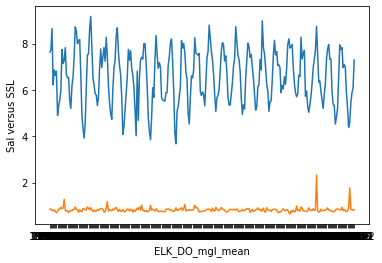

In [ ]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

# creating DataFrame
dataFrame = pd.read_csv('A_CSV_files/no_blank_all_WQ_Merged.csv')

# time series plot for multiple columns
sb.lineplot(x="Date", y="DO_mgl_mean", data=dataFrame)
sb.lineplot(x="Date", y="DO_mean", data=dataFrame)

# set label
plt.ylabel("Sal versus SSL")

plt.show()

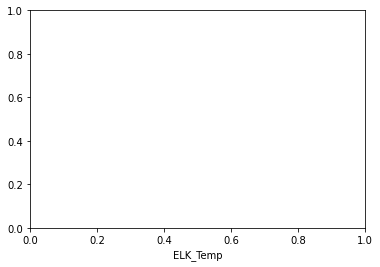

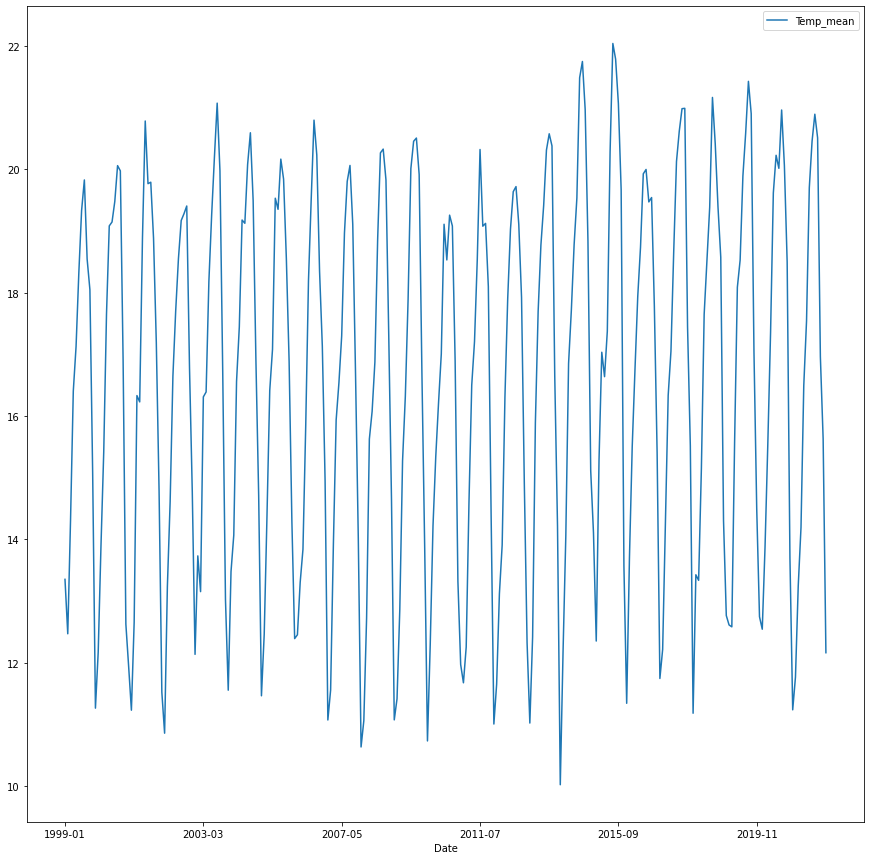

In [ ]:
import pandas as pd
df = pd.read_csv('A_CSV_files/no_blank_all_WQ_Merged.csv')

#df.plot(x="Date", y=['ChlA_mean', 'GNDVI_mean'])
plt.xlabel('ELK_Temp')
df.plot(x="Date", y=['Temp_mean'], figsize=(15, 15))

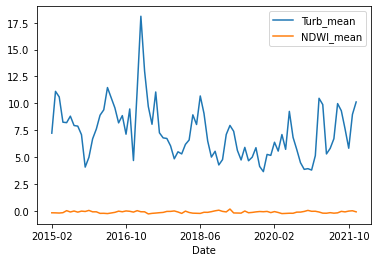

In [ ]:
#greater than the start date and smaller than the end date
mask = (df['Date'] > '2015-01') & (df['Date'] <= '2021-12')
df = df.loc[mask]
df.plot(x="Date", y=['Turb_mean', 'NDWI_mean'])

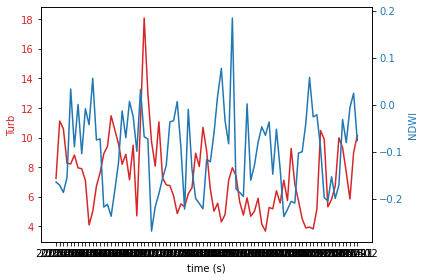

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
df = pd.read_csv('A_CSV_files/no_blank_all_WQ_Merged.csv')
mask = (df['Date'] > '2015-01') & (df['Date'] <= '2021-12')
df = df.loc[mask]
data1 = df['Turb_mean']
data2 = df['NDWI_mean']


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Turb', color=color)
ax1.plot(df['Date'], data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('NDWI', color=color)  # we already handled the x-label with ax1
ax2.plot(df['Date'], data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()